In [1]:
import requests
import pandas as pd
import numpy as np
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_pickle("GasD.pkl")
df['ds'] = pd.to_datetime(df['ds'])
df = df.rename(columns={'SALES': 'Gas D'})
df_merged = df

df = pd.read_pickle("HeatOilD.pkl")
df['ds'] = pd.to_datetime(df['ds'])
df = df.rename(columns={'SALES': 'Heat Oil D'})
df_merged = pd.merge(df_merged, df, on='ds', how='outer')

df = pd.read_pickle("DieselD.pkl")
df['ds'] = pd.to_datetime(df['ds'])
df = df.rename(columns={'SALES': 'Diesel D'})
df_merged = pd.merge(df_merged, df, on='ds', how='outer')

df = pd.read_pickle("JetFuelD.pkl")
df['ds'] = pd.to_datetime(df['ds'])
df = df.rename(columns={'SALES': 'Jet Fuel D'})
df_merged = pd.merge(df_merged, df, on='ds', how='outer')



# === Load and Merge Price Columns ===

# Load Gasoline1.pkl
df_gas = pd.read_pickle("Gasoline1.pkl")[['ds', 'Gas Price', 'WTI']].copy()
df_gas['ds'] = pd.to_datetime(df_gas['ds'])
df_gas = df_gas.rename(columns={'Gas Price': 'Gasoline Price', 'WTI': 'WTI Price'})

# Load HeatOil1.pkl
df_heat = pd.read_pickle("HeatOil1.pkl")[['ds', 'Heat Oil']].copy()
df_heat['ds'] = pd.to_datetime(df_heat['ds'])
df_heat = df_heat.rename(columns={'Gas Price': 'Heating Oil Price'})

# Load Diesel1.pkl
df_diesel = pd.read_pickle("Diesel1.pkl")[['ds', 'Diesel']].copy()
df_diesel['ds'] = pd.to_datetime(df_diesel['ds'])
df_diesel = df_diesel.rename(columns={'Gas Price': 'Diesel Price'})

# Load JetFuel1.pkl
df_jet = pd.read_pickle("JetFuel1.pkl")[['ds', 'Jet Fuel']].copy()
df_jet['ds'] = pd.to_datetime(df_jet['ds'])
df_jet = df_jet.rename(columns={'Gas Price': 'Jet Fuel Price'})

# === Merge all prices into df_merged ===
df_merged = pd.merge(df_merged, df_gas, on='ds', how='left')
df_merged = pd.merge(df_merged, df_heat, on='ds', how='left')
df_merged = pd.merge(df_merged, df_diesel, on='ds', how='left')
df_merged = pd.merge(df_merged, df_jet, on='ds', how='left')

# === Final output ===

# Pull EIA Data
EIA_KEY = 'S5kBDUycUiKkFCG6uxywpfYtq7IzU7AAhOgoUU4y'


# Initialize parameters
Date = "2010-01-01"
End = None
# API endpoints 
# EIA endpoints


url = 'https://api.eia.gov/v2/petroleum/pnp/unc/data/'
total = 'https://api.eia.gov/v2/total-energy/data/'

# Parameters


D = {
    "api_key": EIA_KEY, # API key
    "frequency": "monthly", # Frequency of data
    "data[0]": "value",  
    "facets[msn][0]": "CORIPUS",  # Series ID
    "start": Date , # Start date
    "end": End, # End date
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 500
}


response2 = requests.get(total, params=D)
data2 = response2.json()
df1 = pd.DataFrame(data2['response']['data'])
df1 = df1[['period', 'value']]
df1.rename(columns={'value': 'Demand'}, inplace=True)
df1.rename(columns={'period': 'ds'}, inplace=True)



for df in [df1]:
    df['ds'] = pd.to_datetime(df['ds']).dt.to_period('M').dt.to_timestamp()
df_merged = df_merged.copy()
df_merged = pd.merge(df_merged, df1, on='ds', how='outer')


print(df_merged.tail())

df_merged.to_pickle("Refinery.pkl")


            ds         Gas D  Heat Oil D     Diesel D   Jet Fuel D  \
183 2025-04-01  50785.000000  214.438934  2920.907471  1852.633000   
184 2025-05-01  49778.000000  174.342957  3026.916016  1752.854004   
185 2025-06-01  50992.859375  135.626617  3050.142578  1772.505981   
186 2025-07-01  52607.683594  125.703873  3103.101562  1763.519409   
187 2025-08-01  54611.167969  217.440033  3238.757080  1754.831055   

    Gasoline Price  WTI Price  Heat Oil    Diesel  Jet Fuel     Demand  
183          1.996      63.54     2.031     2.131     1.976  15867.467  
184           2.03      62.17     1.984     2.082     1.928      16582  
185          2.074      68.17     2.174     2.281     2.094        NaN  
186       2.095143  68.232104  2.291286  2.402571  2.205357        NaN  
187            NaN        NaN       NaN       NaN       NaN        NaN  


In [3]:
# Pull EIA Data
EIA_KEY = 'S5kBDUycUiKkFCG6uxywpfYtq7IzU7AAhOgoUU4y'


# Initialize parameters
Date = "2010-01-01"
End = None
# API endpoints 
# EIA endpoints


url = 'https://api.eia.gov/v2/petroleum/pnp/wiup/data/'

# Parameters

Util = {
    "api_key": EIA_KEY, # API key
    "frequency": "weekly", # Frequency of data
    "data[0]": "value",  
    "facets[series][0]": "WPULEUS3",  # Series ID
    "start": Date , # Start date
    "end": End, # End date
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 500
}

response2 = requests.get(url, params=Util)
data2 = response2.json()
df6 = pd.DataFrame(data2['response']['data'])
df6 = df6[['period', 'value']]
df6.rename(columns={'value': 'utilization'}, inplace=True)
df6.rename(columns={'period': 'ds'}, inplace=True)

import pandas as pd

# 1. Ensure your weekly df6 has a proper datetime and numeric column
df6['ds'] = pd.to_datetime(df6['ds'])
df6['utilization'] = pd.to_numeric(df6['utilization'], errors='coerce')

# 2. Aggregate to month-start frequency
df6_monthly = (
    df6
    .set_index('ds')
    .resample('MS')['utilization']    # 'MS' = month start
    .mean()
    .reset_index()
)

# 3. Also ensure your monthly df has a datetime 'ds'
df = pd.read_pickle("Refinery.pkl")
df['ds'] = pd.to_datetime(df['ds'])

# 4. Merge the two (left-join keeps all your existing monthly rows)
df_merged = df.merge(df6_monthly, on='ds', how='left')

# 5. (Optional) sort by date
df_merged = df_merged.sort_values('ds').reset_index(drop=True)

df_merged.to_pickle("Refinery.pkl")
print(df_merged.tail())

            ds         Gas D  Heat Oil D     Diesel D   Jet Fuel D  \
183 2025-04-01  50785.000000  214.438934  2920.907471  1852.633000   
184 2025-05-01  49778.000000  174.342957  3026.916016  1752.854004   
185 2025-06-01  50992.859375  135.626617  3050.142578  1772.505981   
186 2025-07-01  52607.683594  125.703873  3103.101562  1763.519409   
187 2025-08-01  54611.167969  217.440033  3238.757080  1754.831055   

    Gasoline Price  WTI Price  Heat Oil    Diesel  Jet Fuel     Demand  \
183          1.996      63.54     2.031     2.131     1.976  15867.467   
184           2.03      62.17     1.984     2.082     1.928      16582   
185          2.074      68.17     2.174     2.281     2.094        NaN   
186       2.095143  68.232104  2.291286  2.402571  2.205357        NaN   
187            NaN        NaN       NaN       NaN       NaN        NaN   

     utilization  
183       87.425  
184       90.700  
185       94.275  
186       94.700  
187          NaN  


In [4]:
# Adjust for EIA reporting error
EIA_KEY = 'S5kBDUycUiKkFCG6uxywpfYtq7IzU7AAhOgoUU4y'


# Initialize parameters
Date = "2010-01-01"
End = None
# API endpoints 
# EIA endpoints

sndurl = 'https://api.eia.gov/v2/petroleum/sum/snd/data/'

adjust = {
    "api_key": EIA_KEY, # API key
    "frequency": "monthly", # Frequency of data
    "data[0]": "value",  
    "facets[series][0]": "MCRUA_NUS_2",  # Series ID
    "start": Date , # Start date
    "end": End, # End date
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 500
}
response2 = requests.get(sndurl, params=adjust)
data2 = response2.json()
df3 = pd.DataFrame(data2['response']['data'])
df3 = df3[['period', 'value']]
df3.rename(columns={'value': 'Adjust'}, inplace=True)
df3.rename(columns={'period': 'ds'}, inplace=True)

df = pd.read_pickle("Refinery.pkl")
print(df.tail(20))
# Ensure 'ds' is datetime in both DataFrames
df['ds'] = pd.to_datetime(df['ds'])
df3['ds'] = pd.to_datetime(df3['ds'])

# Merge adjustment values into df
df = pd.merge(df, df3[['ds', 'Adjust']], on='ds', how='left')

# Add adjustment to Demand (make sure both columns are numeric)
df['Demand'] = pd.to_numeric(df['Demand'], errors='coerce') + pd.to_numeric(df['Adjust'], errors='coerce')

# Drop the Adjust column if no longer needed
df.drop(columns=['Adjust'], inplace=True)


print(df.tail(20))


            ds         Gas D  Heat Oil D     Diesel D   Jet Fuel D  \
168 2024-01-01  51918.000000  352.614000  2567.040000  1536.200000   
169 2024-02-01  52755.000000  426.249000  2577.321000  1563.982000   
170 2024-03-01  53760.000000  286.204000  2691.566000  1650.865000   
171 2024-04-01  54570.000000  191.919000  2887.670000  1708.474000   
172 2024-05-01  53456.000000  160.690000  2946.733000  1768.152000   
173 2024-06-01  52260.000000  141.288000  2956.225000  1710.171000   
174 2024-07-01  52740.000000   94.911000  3041.980000  1831.680000   
175 2024-08-01  52031.000000   81.461000  3127.108000  1788.855000   
176 2024-09-01  51363.000000  142.796000  2936.639000  1670.613000   
177 2024-10-01  51326.000000  187.025000  3024.428000  1729.743000   
178 2024-11-01  51388.000000  219.907000  2775.842000  1670.359000   
179 2024-12-01  52398.000000  293.378000  2707.959000  1702.444000   
180 2025-01-01  52981.000000  376.313000  2628.573000  1620.217000   
181 2025-02-01  5261


=== Hold-Out Backtest Error Metrics ===
MAE  (Mean Absolute Error):      189.83
RMSE (Root Mean Squared Error): 230.33
MAPE (Mean Absolute % Error):   1.18%


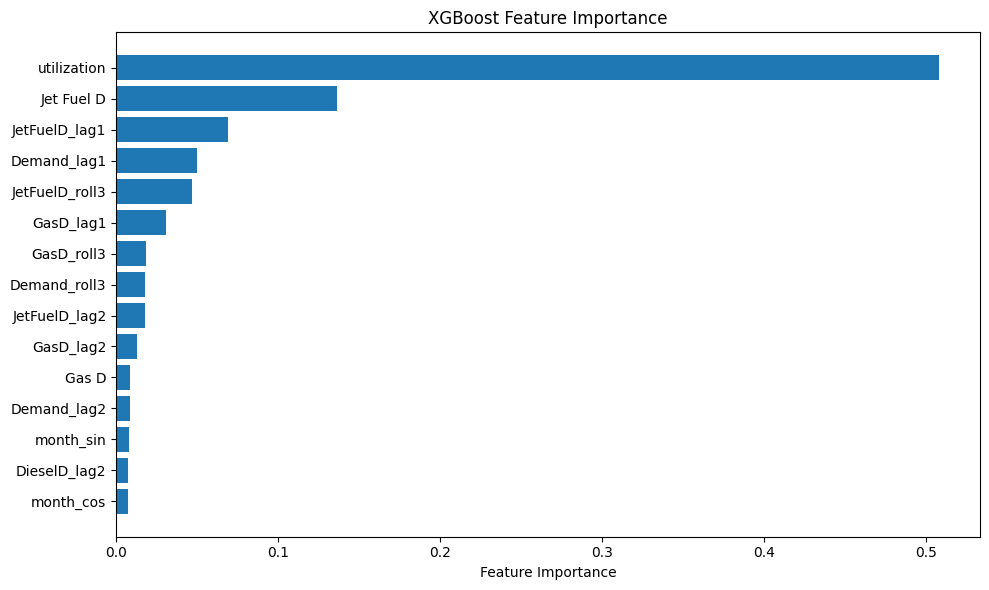


=== Final df with historical + forecasted values ===
        ds       Demand
2025-01-01 15737.000000
2025-02-01 15357.393000
2025-03-01 15829.645000
2025-04-01 15867.467000
2025-05-01 16582.000000
2025-06-01 16863.185547
2025-07-01 16839.779297
2025-08-01 16906.800781

=== Best Parameters Found ===
{'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 400, 'subsample': 0.8}


In [5]:
# === 1. SET PARAMETERS ===
TARGET_COL = 'Demand'
EXOG_COLS = ['Gas D', 'Heat Oil D', 'Jet Fuel D', 'Diesel D', 'utilization']
df = pd.read_pickle("Refinery.pkl")  # Replace with your actual input file
df = df[df['ds'] >= pd.to_datetime('2015-01-01')].reset_index(drop=True)

# === 2. CLEAN DATA ===
df['ds'] = pd.to_datetime(df['ds'], errors='coerce')
df[TARGET_COL] = pd.to_numeric(df[TARGET_COL], errors='coerce')
for col in EXOG_COLS:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.sort_values('ds').reset_index(drop=True)

# === 3. FEATURE ENGINEERING ===
df['month_num'] = df['ds'].dt.month
df['month_sin'] = np.sin(2 * np.pi * df['month_num'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month_num'] / 12)

for lag in [1, 2, 3, 6]:
    df[f'{TARGET_COL}_lag{lag}'] = df[TARGET_COL].shift(lag)
    for col in EXOG_COLS:
        df[f'{col.replace(" ", "")}_lag{lag}'] = df[col].shift(lag)

df[f'{TARGET_COL}_roll3'] = df[TARGET_COL].rolling(window=3).mean().shift(1)
for col in EXOG_COLS:
    df[f'{col.replace(" ", "")}_roll3'] = df[col].rolling(window=3).mean().shift(1)

# === 4. DEFINE FEATURES & TARGET ===
features = (
    EXOG_COLS +
    ['month_num', 'month_sin', 'month_cos'] +
    [f'{TARGET_COL}_lag{l}' for l in [1,2,3,6]] +
    [f'{TARGET_COL}_roll3'] +
    [f'{col.replace(" ", "")}_lag1' for col in EXOG_COLS] +
    [f'{col.replace(" ", "")}_lag2' for col in EXOG_COLS] +
    [f'{col.replace(" ", "")}_roll3' for col in EXOG_COLS]
)

df_hist = df.dropna(subset=[TARGET_COL] + features).copy()
X_train = df_hist[features].apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(df_hist[TARGET_COL], errors='coerce')

valid_idx = X_train.dropna().index
X_train = X_train.loc[valid_idx]
y_train = y_train.loc[valid_idx]

# === 5. TRUE HOLD-OUT BACKTEST (80% train, 20% test) ===
df_backtest = df_hist.loc[valid_idx].copy()
X_all = df_backtest[features]
y_all = df_backtest[TARGET_COL]

split_index = int(len(X_all) * 0.8)
X_train_split, X_test = X_all.iloc[:split_index], X_all.iloc[split_index:]
y_train_split, y_test = y_all.iloc[:split_index], y_all.iloc[split_index:]

model = XGBRegressor(
    n_estimators=800,
    max_depth=8,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.9,
    random_state=42
)
model.fit(X_train_split, y_train_split, verbose=False)

y_pred_test = model.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

print("\n=== Hold-Out Backtest Error Metrics ===")
print(f"MAE  (Mean Absolute Error):      {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape:.2f}%")

# === 6. RE-TRAIN ON ALL DATA BEFORE FORECASTING ===
model.fit(X_train, y_train, verbose=False)

#

importances = model.feature_importances_
feature_names = X_train.columns
sorted_idx = np.argsort(importances)[::-1]

top_n = 15
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), importances[sorted_idx][:top_n][::-1])
plt.yticks(range(top_n), [feature_names[i] for i in sorted_idx[:top_n]][::-1])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

# === 7. FORECAST MISSING TARGET VALUES ===
missing_idxs = df.index[df[TARGET_COL].isna()]

for i in missing_idxs:
    prior = df.loc[:i - 1].copy()
    last = prior.iloc[-1]

    new_feats = {
        'month_num': df.at[i, 'ds'].month,
        'month_sin': np.sin(2 * np.pi * df.at[i, 'ds'].month / 12),
        'month_cos': np.cos(2 * np.pi * df.at[i, 'ds'].month / 12),
        f'{TARGET_COL}_lag1': last[TARGET_COL],
        f'{TARGET_COL}_lag2': last[f'{TARGET_COL}_lag1'],
        f'{TARGET_COL}_lag3': last[f'{TARGET_COL}_lag2'],
        f'{TARGET_COL}_lag6': prior[TARGET_COL].iloc[-6] if len(prior) >= 6 else last[TARGET_COL],
        f'{TARGET_COL}_roll3': pd.to_numeric(prior[TARGET_COL].iloc[-3:], errors='coerce').mean(),
    }

    for col in EXOG_COLS:
        new_feats[col] = df.at[i, col]
        new_feats[f'{col.replace(" ", "")}_lag1'] = last[col]
        new_feats[f'{col.replace(" ", "")}_lag2'] = last[f'{col.replace(" ", "")}_lag1']
        new_feats[f'{col.replace(" ", "")}_roll3'] = pd.to_numeric(prior[col].iloc[-3:], errors='coerce').mean()

    input_df = pd.DataFrame([new_feats])
    input_df = input_df.reindex(columns=features).apply(pd.to_numeric, errors='coerce')
    y_pred = model.predict(input_df)[0]

    df.loc[i, TARGET_COL] = y_pred
    df.loc[i, f'{TARGET_COL}_lag1'] = y_pred
    df.loc[i, f'{TARGET_COL}_lag2'] = last[f'{TARGET_COL}_lag1']
    df.loc[i, f'{TARGET_COL}_lag3'] = last[f'{TARGET_COL}_lag2']
    df.loc[i, f'{TARGET_COL}_lag6'] = prior[TARGET_COL].iloc[-6] if len(prior) >= 6 else y_pred

    roll_vals = pd.concat([prior[TARGET_COL].iloc[-2:], pd.Series([y_pred])])
    df.loc[i, f'{TARGET_COL}_roll3'] = roll_vals.mean() if len(roll_vals) == 3 else y_pred

    for col in EXOG_COLS:
        df.loc[i, f'{col.replace(" ", "")}_lag1'] = last[col]
        df.loc[i, f'{col.replace(" ", "")}_lag2'] = last[f'{col.replace(" ", "")}_lag1']
        df.loc[i, f'{col.replace(" ", "")}_roll3'] = pd.to_numeric(prior[col].iloc[-3:], errors='coerce').mean()

# === 8. FINAL OUTPUT ===
df = df[['ds', TARGET_COL]].copy()
df.to_pickle("RefineryD.pkl")
print("\n=== Final df with historical + forecasted values ===")
print(df.tail(8).to_string(index=False))


#=============================#
#    Optimize Parameters      #
#=============================#

from sklearn.model_selection import GridSearchCV

# === 5A. HYPERPARAMETER TUNING ===
# === HYPERPARAMETER SEARCH ONLY ===
param_grid = {
    'n_estimators': [100, 200, 300, 400, 600, 800],
    'max_depth': [2, 4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.9, 0.8, 0.6],
    'colsample_bytree': [0.9, 0.8, 0.6]
}

grid_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=grid_model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=0,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("\n=== Best Parameters Found ===")
print(grid_search.best_params_)